In [12]:
import os

In [ ]:
base_path = "./dataset/part_A_final"

train_img_path = os.path.join(base_path, "train_data", "images")
train_gt_path  = os.path.join(base_path, "train_data", "ground_truth")

test_img_path = os.path.join(base_path, "test_data", "images")
test_gt_path  = os.path.join(base_path, "test_data", "ground_truth")

print("Train images:", train_img_path)
print("Train GT:", train_gt_path)


Train images: ./dataset/part_A_final\train_data\images
Train GT: ./dataset/part_A_final\train_data\ground_truth


In [14]:
#Listing files

train_imgs = sorted(os.listdir(train_img_path))
train_gts  = sorted(os.listdir(train_gt_path))

print("Num train images:", len(train_imgs))
print("Num train GT:", len(train_gts))

print("Example image:", train_imgs[0])
print("Example GT:", train_gts[0])


Num train images: 300
Num train GT: 300
Example image: IMG_1.jpg
Example GT: GT_IMG_1.mat


In [18]:
!pip install opencv-python
!pip install h5py
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
    --------------------------------------- 0.8/39.0 MB 4.8 MB/s eta 0:00:09
   - -------------------------------------- 1.6/39.0 MB 4.2 MB/s eta 0:00:09
   -- ------------------------------------- 2.4/39.0 MB 4.2 MB/s eta 0:00:09
   --- ------------------------------------ 3.1/39.0 MB 3.9 MB/s eta 0:00:10
   ---- ----------------------------------- 3.9/39.0 MB 4.1 MB/s eta 0:00:09
   ----- ---------------------------------- 5.0/39.0 MB 4.1 MB/s eta 0:00:09
   ------ --------------------------------- 6.0/39.0 MB 4.3 MB/s eta 0:00:08
   ------ --------------------------------- 6.6/39.0 MB 4.2 MB/s eta 0:00:08
   -------- ------------------------------- 7.9/39.0 MB 4.3 MB/s eta 0:00:08
   -------- ------------------------------- 8.7/39.0 MB 4.4 MB/s eta 0:00:07
   --------- ------------------------------ 9.7/39.0 MB 4.3 MB/s eta 0:00:07
   --


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.9 MB 2.8 MB/s eta 0:00:01
   ------------------ --------------------- 1.3/2.9 MB 3.2 MB/s eta 0:00:01
   -------------------------------- ------- 2.4/2.9 MB 3.6 MB/s eta 0:00:01
   ------------------------------------ --- 2.6/2.9 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 2.9/2.9 MB 2.9 MB/s  0:00:00



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
!pip install torch torchvision opencv-python numpy pandas matplotlib pillow scipy scikit-learn plotly tqdm flask streamlit twilio requests pyyaml


^C


Defaulting to user installation because normal site-packages is not writeable
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached pyarrow-21.0.0-cp312-cp312-win_amd64.whl.metadata (3.4 kB)
   ---------------------------------------- 0.0/110.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/110.9 MB 3.4 MB/s eta 0:00:33
   ---------------------------------------- 1.3/110.9 MB 2.9 MB/s eta 0:00:38
    --------------------------------------- 1.6/110.9 MB 2.7 MB/s eta 0:00:41
    --------------------------------------- 2.4/110.9 MB 2.7 MB/s eta 0:00:41
   - -------------------------------------- 2.9/110.9 MB 2.8 MB/s eta 0:00:40
   - -------------------------------------- 3.4/110.9 MB 2.7 MB/s eta 0:00:41
   - -------------------------------------- 4.2/110.9 MB 2.9 MB/s eta 0:00:38
   - -------------------------------------- 5.2/110.9 MB 3.0 MB/s eta 0:00:35
   -- ------------------------------------- 6.3/110.9 MB 3.2 MB/s eta 0:00:33
   -- --------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import os
import cv2
import numpy as np
from scipy.io import loadmat
from scipy.spatial import KDTree
from scipy.ndimage import gaussian_filter
import torch
import matplotlib.pyplot as plt


In [29]:
#loading image

def load_sample(idx=0):
    img_file = train_imgs[idx]
    gt_file  = train_gts[idx]   # .mat file
    
    img_path = os.path.join(train_img_path, img_file)
    gt_path  = os.path.join(train_gt_path, gt_file)
    
    # Load image
    img = cv2.imread(img_path)

    #convert BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Load .mat ground truth
    gt = loadmat(gt_path)
    points = gt["image_info"][0][0][0][0][0]   # (N,2) head coordinates

    # Create empty density map
    density = np.zeros((img.shape[0], img.shape[1]), dtype=np.float32)

    # Add Gaussian at each head location
    for x, y in points:
        if int(y) < density.shape[0] and int(x) < density.shape[1]:
            density[int(y), int(x)] = 1
    
    # Apply Gaussian filter
    density = gaussian_filter(density, sigma=4)

    return img, density



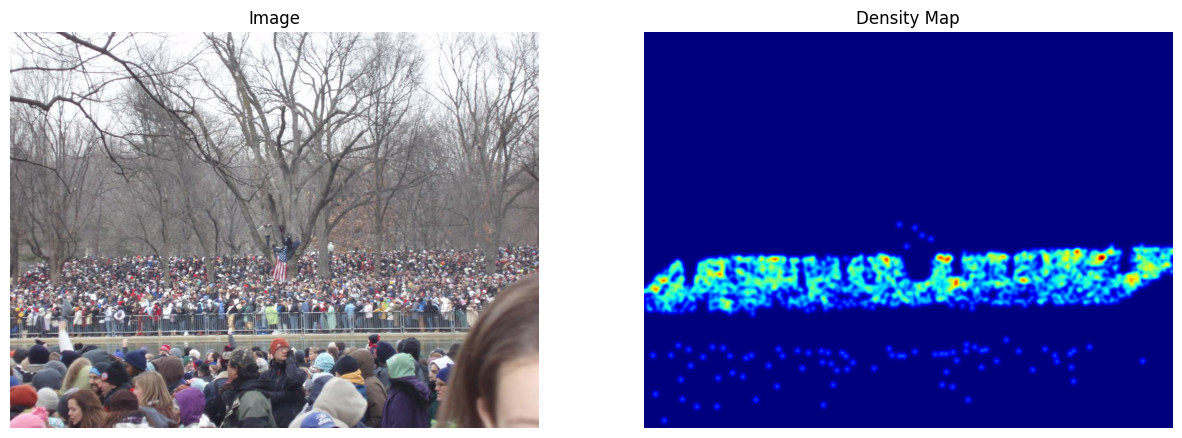

People count: 1545.0002


In [32]:

img, density = load_sample(0)

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title("Image")
plt.imshow(img)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Density Map")
plt.imshow(density, cmap='jet')
plt.axis("off")

plt.show()

print("People count:", np.sum(density))


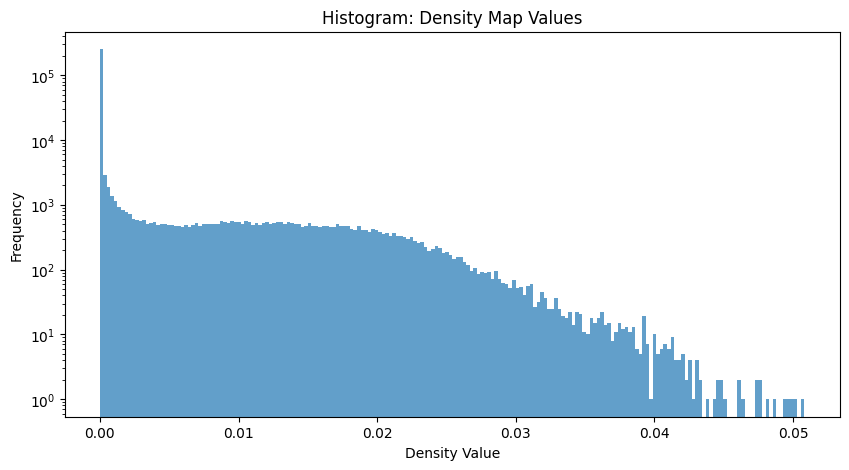

In [44]:
# Histogram of density map values

plt.figure(figsize=(10,5))
plt.hist(density_resized.ravel(), bins=200, alpha=0.7)
plt.title("Histogram: Density Map Values")
plt.xlabel("Density Value")
plt.ylabel("Frequency")
plt.yscale("log")     # density maps have heavy long-tail → log-scale helps
plt.show()


In [39]:
#resize image and density map
# Cell 5: resize image + density map while preserving total count

# SET target size (change as needed). Format: (H, W)
target_H, target_W = 480, 640   # example target resolution

# Resize image (cv2 expects (width, height))
img_resized = cv2.resize(img, (target_W, target_H), interpolation=cv2.INTER_LINEAR)

# Resize density map (use INTER_LINEAR). Then renormalize so counts match.
density_resized = cv2.resize(density, (target_W, target_H), interpolation=cv2.INTER_LINEAR)

orig_sum = density.sum()
resized_sum = density_resized.sum()
if resized_sum > 0:
    density_resized = density_resized * (orig_sum / resized_sum)

print("After resize - image shape:", img_resized.shape)
print("After resize - density sum (people count preserved):", density_resized.sum())


After resize - image shape: (480, 640, 3)
After resize - density sum (people count preserved): 603.51514


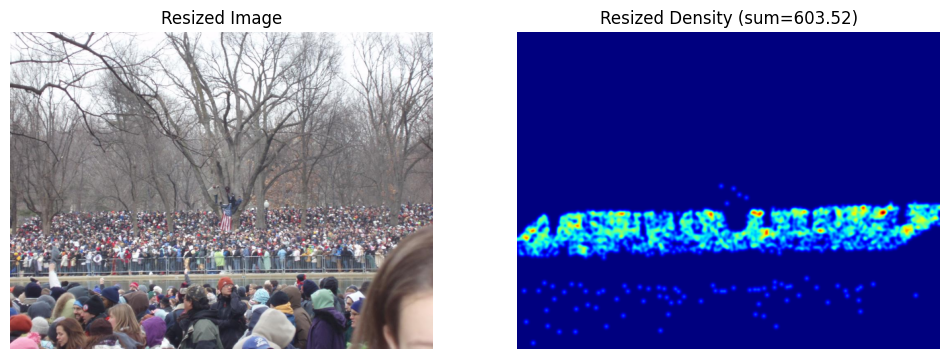

In [40]:
#visualize above
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img_resized.astype(np.uint8))
plt.title("Resized Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(density_resized, cmap="jet")
plt.title(f"Resized Density (sum={density_resized.sum():.2f})")
plt.axis("off")

plt.show()


In [41]:
#convert to PyTorch tensors

# Image: H x W x C -> C x H x W, normalized to [0,1] float32
img_tensor = torch.from_numpy(img_resized.astype(np.float32) / 255.0).permute(2,0,1).contiguous()

# Density: H x W -> 1 x H x W (float32)
density_tensor = torch.from_numpy(density_resized.astype(np.float32)).unsqueeze(0).contiguous()

print("img_tensor.shape:", img_tensor.shape)         # expect (3, H, W)
print("density_tensor.shape:", density_tensor.shape) # expect (1, H, W)
print("density_tensor.sum():", float(density_tensor.sum()))


img_tensor.shape: torch.Size([3, 480, 640])
density_tensor.shape: torch.Size([1, 480, 640])
density_tensor.sum(): 603.5152587890625


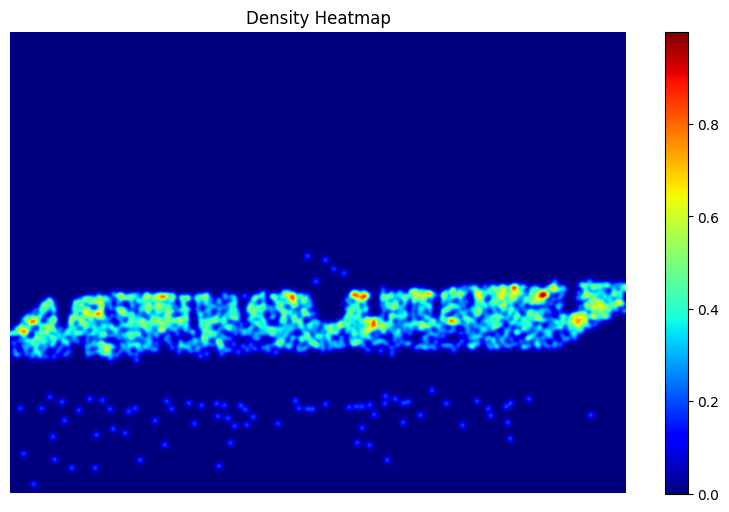

In [48]:
import matplotlib.pyplot as plt

# Convert density map back to numpy for visualization
density_np = density_tensor.squeeze(0).numpy()

# Normalize for clean visualization
density_norm = density_np / (density_np.max() + 1e-6)

plt.figure(figsize=(10, 6))
plt.title("Density Heatmap")
plt.imshow(density_norm, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.show()


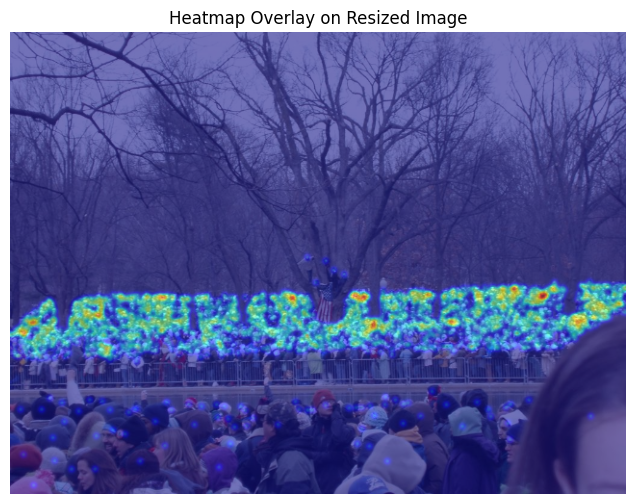

In [49]:
plt.figure(figsize=(10, 6))
plt.title("Heatmap Overlay on Resized Image")

plt.imshow(img_resized)            # RGB image
plt.imshow(density_norm, 
           cmap='jet', 
           alpha=0.55)             # heatmap with transparency

plt.axis('off')
plt.show()
